In [2]:
import utils
import shap
import numpy as np
from joblib import dump, load
from ucimlrepo import fetch_ucirepo

covertype = fetch_ucirepo(id=31) 
  
X = covertype.data.features 
y = covertype.data.targets 

C:\Users\Kills\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
X_clean, y_clean = utils.clean_data(X, y)

X_train, X_test, y_train, y_test =  utils.split_data(X_clean, y_clean)
X_train_scaled, X_test_scaled, y_train, y_test =  utils.scale_data(X_train, X_test, y_train, y_test)

In [5]:
X_background_scaled = shap.sample(X_train_scaled, 50, random_state=34)
X_background = shap.sample(X_train, 50, random_state=34)


In [4]:
knn_model = load('../data/best_knn.joblib')
decision_tree_model = load('../data/best_decision_tree.joblib')

In [6]:
X_sample = X_test[:100]
X_sample_scaled = X_test_scaled[:100]

## Decision Tree SHAP Interpretibility

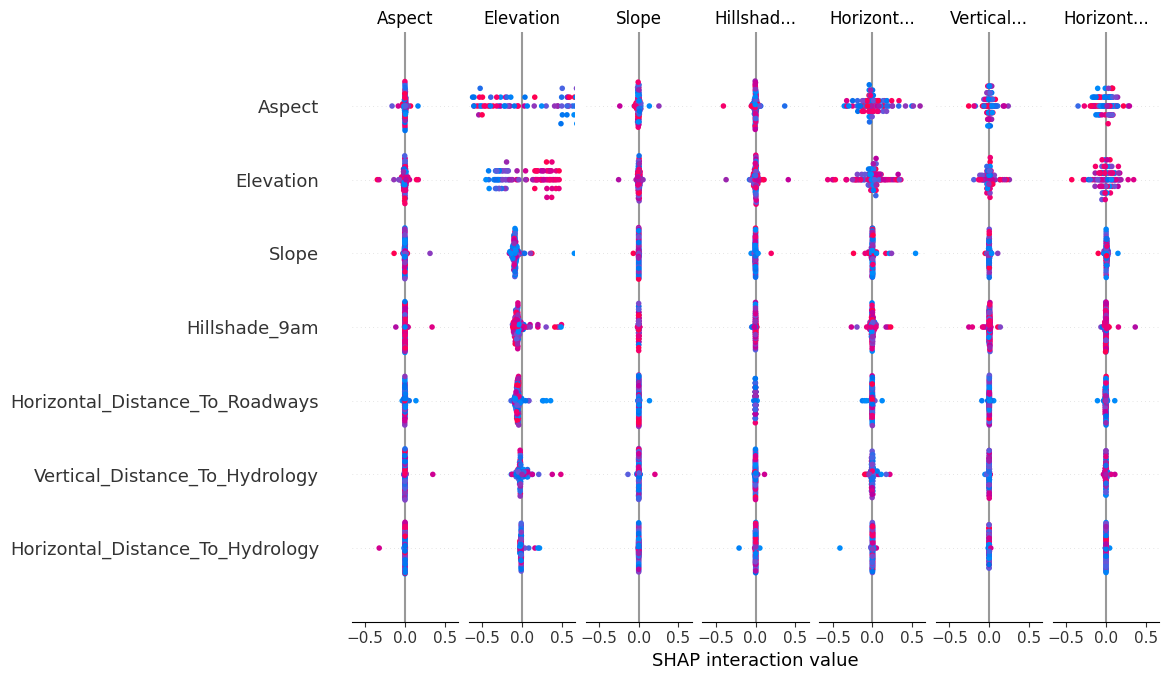

In [6]:
decision_tree_explainer = shap.TreeExplainer(decision_tree_model)

shap_values_tree = decision_tree_explainer.shap_values(X_sample)

shap.summary_plot(
    shap_values_tree, 
    X_sample, 
    plot_type="bar",
)
shap.summary_plot(
    shap_values_tree,
    X_sample,
    plot_type="beeswarm"
)


## KNN SHAP Interpretibility 

In [ ]:
X_sample_scaled = X_test_scaled[:20]
knn_explainer = shap.KernelExplainer(knn_model.predict_proba, X_sample_scaled)

shap_values_knn = knn_explainer.shap_values(X_sample_scaled, n_samples=100)

  0%|          | 0/20 [00:00<?, ?it/s]

In [8]:
shap.summary_plot(
    shap_values_knn, 
    X_sample_scaled, 
    plot_type="bar",
)
shap.summary_plot(
    shap_values_knn,
    X_sample_scaled,
    plot_type="beeswarm"
)

## Neural Network Interpretability

### I know something is currently horribly wrong with the model, this is just for testing that the commands work haha

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


  1%|          | 1/100 [00:17<28:28, 17.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


  2%|▏         | 2/100 [00:38<31:48, 19.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step


  3%|▎         | 3/100 [01:03<35:38, 22.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


  4%|▍         | 4/100 [01:20<32:26, 20.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


  5%|▌         | 5/100 [01:36<29:27, 18.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


  6%|▌         | 6/100 [01:54<28:34, 18.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


  7%|▋         | 7/100 [02:08<26:32, 17.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


  8%|▊         | 8/100 [02:22<24:34, 16.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


  9%|▉         | 9/100 [02:36<23:14, 15.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 10%|█         | 10/100 [02:49<22:04, 14.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 11%|█         | 11/100 [03:05<22:06, 14.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 12%|█▏        | 12/100 [03:19<21:36, 14.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 13%|█▎        | 13/100 [03:34<21:29, 14.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 14%|█▍        | 14/100 [03:49<21:28, 14.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 15%|█▌        | 15/100 [04:04<20:57, 14.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 16%|█▌        | 16/100 [04:18<20:31, 14.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 17%|█▋        | 17/100 [04:33<20:20, 14.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 18%|█▊        | 18/100 [04:54<22:39, 16.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 19%|█▉        | 19/100 [05:08<21:36, 16.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 20%|██        | 20/100 [05:23<20:50, 15.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 21%|██        | 21/100 [05:37<20:01, 15.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 22%|██▏       | 22/100 [05:52<19:24, 14.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 23%|██▎       | 23/100 [06:07<19:06, 14.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 24%|██▍       | 24/100 [06:21<18:32, 14.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 25%|██▌       | 25/100 [06:35<18:21, 14.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 26%|██▌       | 26/100 [06:50<17:54, 14.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 27%|██▋       | 27/100 [07:05<17:58, 14.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 28%|██▊       | 28/100 [07:20<17:55, 14.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 29%|██▉       | 29/100 [07:35<17:41, 14.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 30%|███       | 30/100 [07:50<17:24, 14.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 31%|███       | 31/100 [08:05<17:05, 14.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 32%|███▏      | 32/100 [08:18<16:26, 14.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 33%|███▎      | 33/100 [08:34<16:26, 14.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


 34%|███▍      | 34/100 [08:47<15:38, 14.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 35%|███▌      | 35/100 [09:00<15:15, 14.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 36%|███▌      | 36/100 [09:15<15:01, 14.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 37%|███▋      | 37/100 [09:28<14:39, 13.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


 38%|███▊      | 38/100 [09:41<14:05, 13.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 39%|███▉      | 39/100 [09:56<14:10, 13.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 40%|████      | 40/100 [10:11<14:13, 14.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 41%|████      | 41/100 [10:26<14:17, 14.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 42%|████▏     | 42/100 [10:41<14:06, 14.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


 43%|████▎     | 43/100 [10:56<14:12, 14.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 44%|████▍     | 44/100 [11:11<13:42, 14.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 45%|████▌     | 45/100 [11:24<13:09, 14.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 46%|████▌     | 46/100 [11:39<13:06, 14.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 47%|████▋     | 47/100 [11:54<12:57, 14.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 48%|████▊     | 48/100 [12:09<12:50, 14.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 49%|████▉     | 49/100 [12:23<12:27, 14.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 50%|█████     | 50/100 [12:38<12:13, 14.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 51%|█████     | 51/100 [12:52<11:48, 14.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 52%|█████▏    | 52/100 [13:06<11:29, 14.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 53%|█████▎    | 53/100 [13:21<11:15, 14.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 54%|█████▍    | 54/100 [13:35<11:03, 14.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 55%|█████▌    | 55/100 [13:49<10:43, 14.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 56%|█████▌    | 56/100 [14:04<10:35, 14.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 57%|█████▋    | 57/100 [14:18<10:17, 14.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 58%|█████▊    | 58/100 [14:32<09:52, 14.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 59%|█████▉    | 59/100 [14:46<09:36, 14.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


 60%|██████    | 60/100 [15:01<09:42, 14.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 61%|██████    | 61/100 [15:16<09:26, 14.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 62%|██████▏   | 62/100 [15:30<09:12, 14.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 63%|██████▎   | 63/100 [15:46<09:05, 14.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 64%|██████▍   | 64/100 [16:00<08:46, 14.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 65%|██████▌   | 65/100 [16:14<08:26, 14.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 66%|██████▌   | 66/100 [16:28<08:06, 14.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 67%|██████▋   | 67/100 [16:43<07:59, 14.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


 68%|██████▊   | 68/100 [16:59<07:59, 14.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 69%|██████▉   | 69/100 [17:14<07:47, 15.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 70%|███████   | 70/100 [17:29<07:29, 14.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 71%|███████   | 71/100 [17:45<07:18, 15.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 72%|███████▏  | 72/100 [18:01<07:12, 15.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 73%|███████▎  | 73/100 [18:15<06:49, 15.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 74%|███████▍  | 74/100 [18:36<07:19, 16.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 75%|███████▌  | 75/100 [18:50<06:40, 16.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 76%|███████▌  | 76/100 [19:04<06:10, 15.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 77%|███████▋  | 77/100 [19:18<05:45, 15.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 78%|███████▊  | 78/100 [19:32<05:22, 14.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 79%|███████▉  | 79/100 [19:51<05:35, 15.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


 80%|████████  | 80/100 [20:09<05:28, 16.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


 81%|████████  | 81/100 [20:24<05:06, 16.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


 82%|████████▏ | 82/100 [20:42<04:57, 16.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 83%|████████▎ | 83/100 [20:56<04:30, 15.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 84%|████████▍ | 84/100 [21:10<04:06, 15.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 85%|████████▌ | 85/100 [21:25<03:48, 15.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 86%|████████▌ | 86/100 [21:40<03:29, 14.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 87%|████████▋ | 87/100 [21:55<03:15, 15.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 88%|████████▊ | 88/100 [22:12<03:08, 15.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


 89%|████████▉ | 89/100 [22:28<02:53, 15.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


 90%|█████████ | 90/100 [22:44<02:37, 15.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 91%|█████████ | 91/100 [22:57<02:15, 15.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 92%|█████████▏| 92/100 [23:11<01:57, 14.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 93%|█████████▎| 93/100 [23:24<01:39, 14.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 94%|█████████▍| 94/100 [23:38<01:24, 14.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 95%|█████████▌| 95/100 [23:52<01:09, 13.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 96%|█████████▌| 96/100 [24:07<00:57, 14.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 97%|█████████▋| 97/100 [24:21<00:43, 14.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 98%|█████████▊| 98/100 [24:36<00:28, 14.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 99%|█████████▉| 99/100 [24:51<00:14, 14.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
6607/6607 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


100%|██████████| 100/100 [25:06<00:00, 15.06s/it]


<Figure size 640x480 with 0 Axes>

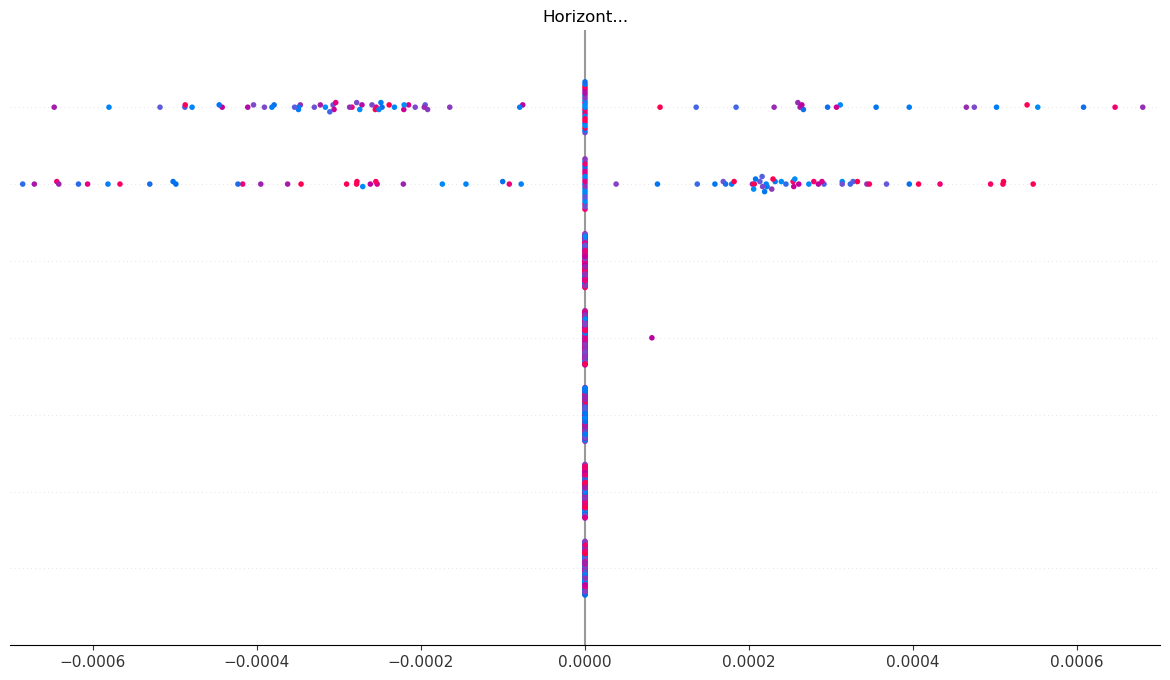

In [10]:
neural_model = load('../data/best_neural_network.joblib')
neural_network_explainer = shap.KernelExplainer(neural_model.predict, X_sample_scaled)

shap_values_neural = neural_network_explainer.shap_values(X_sample_scaled)

shap.summary_plot(
    shap_values_neural,
    X_sample,
    plot_type="bar",
)
shap.summary_plot(
    shap_values_neural,
    X_sample,
    plot_type="beeswarm"
)